# Pymaceuticals Inc.
---

### Analysis

- This study took 248 mice grouped into 10 different drug regimens. Then their tumor volume (mm3) was observed across 45 days/multiple timepoints to evaluate the effect of the drug regimen on the volume tumor.
- The drug regimen of interest, "Capomulin", had a positive correlation with the mouse weight (g) with a score of 0.84, meaning a strong positive correlation.
- Capomulin had similar stats to that of Ramican- with the Tumor means being 40.67/40.21, respectively, while the standard deviation being 4.99/4.84 and sem being .329/.321 respectively- and these two regimens had the lowest stats of all the drug regimens.
- Looking at Capomulin on one specific mouse, s185, there is a significant decrease, 45mm3 to 23.3mm3, in the volume of the tumor over the course of treatment. 
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mice_count = len(combined_df["Mouse ID"].unique())
mice_count

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_mice = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),"Mouse ID"].unique()
duplicated_mice

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_id = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicate_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"].isin(duplicated_mice)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(clean_df["Mouse ID"].unique())
clean_mice_count

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_stats = clean_df.groupby(clean_df["Drug Regimen"])['Tumor Volume (mm3)'].describe()
tumor_stats
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
regimen_mean = clean_df.groupby(clean_df["Drug Regimen"])['Tumor Volume (mm3)'].mean()
regimen_median = clean_df.groupby(clean_df["Drug Regimen"])['Tumor Volume (mm3)'].median()
regimen_variance = clean_df.groupby(clean_df["Drug Regimen"])['Tumor Volume (mm3)'].var()
regimen_std = clean_df.groupby(clean_df["Drug Regimen"])['Tumor Volume (mm3)'].std()
regimen_sem = clean_df.groupby(clean_df["Drug Regimen"])['Tumor Volume (mm3)'].sem()

regimen_stats_df = pd.DataFrame({"Mean Tumor Volume": regimen_mean,
                                 "Median Tumor Volume": regimen_median,
                                 "Tumor Volume Variance": regimen_variance,
                                 "Tumor Volume Std. Dev.": regimen_std,
                                 "Tumor Volume Std. Err.": regimen_sem})
regimen_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regimen_agg = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
regimen_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

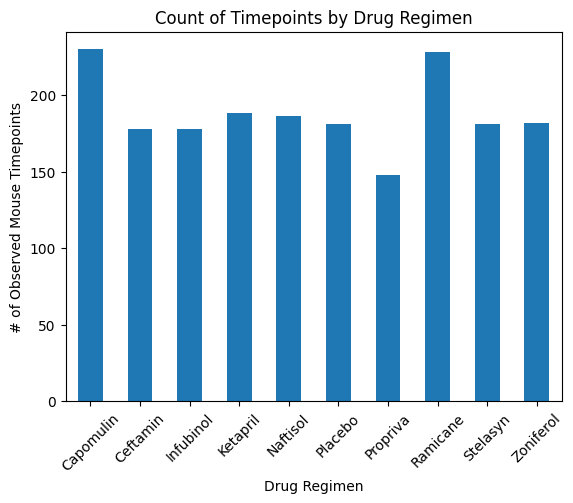

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_bar_df = clean_df.groupby("Drug Regimen").size()
mouse_fig = mouse_bar_df.plot.bar(rot=45)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Count of Timepoints by Drug Regimen")
plt.xticks(rotation=45)
plt.show()

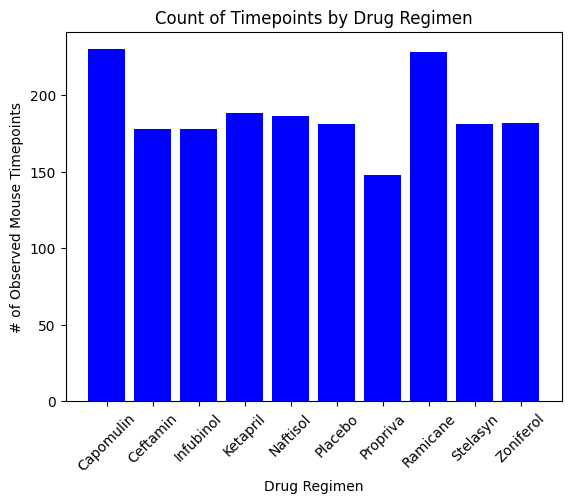

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
y_axis = clean_df.groupby("Drug Regimen")['Timepoint'].count()
x_axis = y_axis.index

fig1 = plt.bar(x_axis, y_axis, color="b", align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Count of Timepoints by Drug Regimen")
plt.xticks(rotation=45)
plt.show()

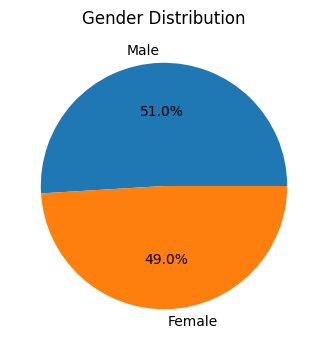

In [15]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
gender_count = clean_df["Sex"].value_counts()
# Get the unique mice with their gender
gender = clean_df.groupby("Mouse ID")["Sex"].unique()
gender

# Make the pie chart
gender_pie = gender_count.plot.pie(autopct='%1.1f%%', figsize=(4, 4), title='Gender Distribution', ylabel= '')
plt.show()

Text(0.5, 1.0, 'Gender Distribution')

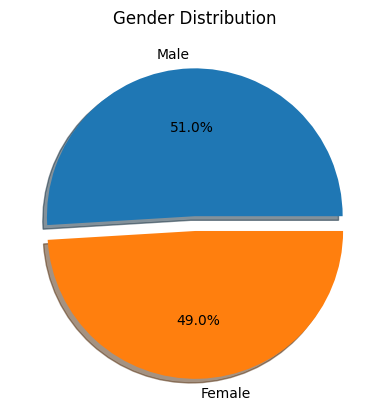

In [16]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
explode = (0, 0.1)
plt.pie(gender_count, explode=explode, labels= ["Male", "Female"], autopct="%1.1f%%", shadow=True)
plt.title("Gender Distribution")

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby(["Drug Regimen", "Mouse ID"])['Timepoint'].max()
last_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_merged = pd.merge(last_timepoint, clean_df, on= ["Mouse ID", "Timepoint"], how="left")
final_merged

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
243,q633,45,Zoniferol,Male,12,25,70.827796,2
244,s337,45,Zoniferol,Male,14,27,62.109651,4
245,w140,5,Zoniferol,Female,19,30,47.717952,0
246,w575,45,Zoniferol,Female,16,28,68.401286,3


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.



    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    volume_df = final_merged.loc[final_merged["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_vol.append(volume_df)
    # add subset
#print(tumor_vol)

    # Determine outliers using upper and lower bounds
quartiles = volume_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


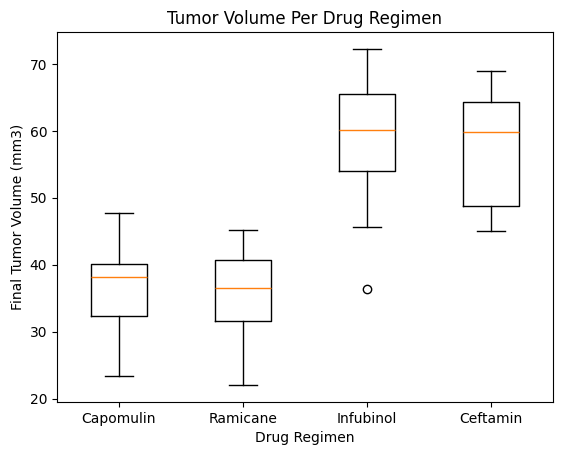

In [20]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume Per Drug Regimen")
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_vol, tick_labels=treatments)
plt.show()

## Line and Scatter Plots

   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   
15     s185    Capomulin  Female           3          17         25   
16     s185    Capomulin  Female           3          17         30   
17     s185    Capomulin  Female           3          17         35   
18     s185    Capomulin  Female           3          17         40   
19     s185    Capomulin  Female           3          17         45   

    Tumor Volume (mm3)  Metastatic Sites  
10           45.000000                 0  
11           43.878496                 0  
12           37.614948                 0  
13           38.177232                 0  
14 

Text(0.5, 1.0, 'Capomulin Treatment for mouse s185')

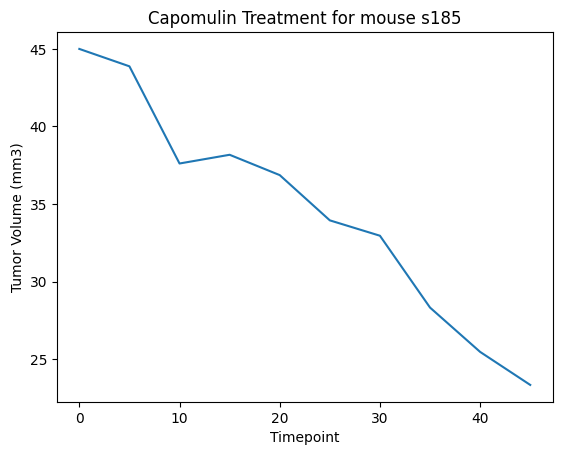

In [66]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_treated = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
#print(cap_treated)

one_mouse = cap_treated.loc[cap_treated['Mouse ID'] == 's185']
print(one_mouse)
#print(one_mouse)
x_axis = one_mouse['Timepoint']
y_axis = one_mouse['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis) 
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment for mouse s185")
#plt.show()

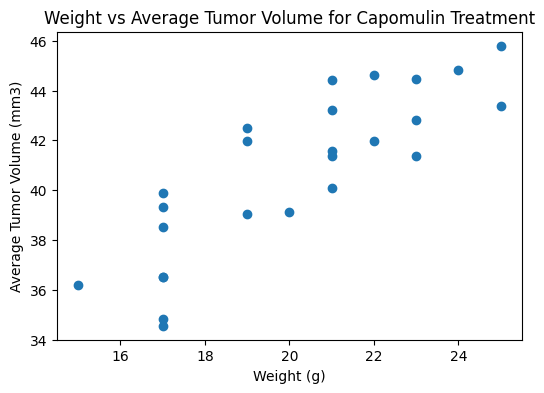

In [43]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

cap_tumor = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin", :]
vol_avg = cap_tumor.groupby(cap_tumor['Mouse ID'])["Tumor Volume (mm3)"].mean()
combined_data = cap_tumor[['Mouse ID', 'Weight (g)']].drop_duplicates().set_index('Mouse ID')
combined_data['Average Tumor Volume (mm3)'] = vol_avg

# Plotting
plt.figure(figsize=(6,4))
plt.scatter(combined_data['Weight (g)'], combined_data['Average Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight vs Average Tumor Volume for Capomulin Treatment')
plt.show()
#vol_avg


## Correlation and Regression

In [50]:
correlation = round(combined_data['Weight (g)'].corr(combined_data['Average Tumor Volume (mm3)']),2)
print(f'The correlation between mouse weight and the average tumor volume for Capomulin regimen is {correlation}.')

The correlation between mouse weight and the average tumor volume for Capomulin regimen is 0.84.


In [53]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
lin_reg=st.linregress(combined_data['Weight (g)'],combined_data['Average Tumor Volume (mm3)'])
lin_reg

LinregressResult(slope=0.9544396890241048, intercept=21.552160532685008, rvalue=0.8419363424694722, pvalue=1.3225722434712285e-07, stderr=0.12754359033201318, intercept_stderr=2.5909876867683446)

In [55]:
slope=0.9544396890241045
intercept=21.552160532685015 
rvalue=0.8419363424694718
pvalue=1.3225722434712642e-07 
stderr=0.1275435903320134

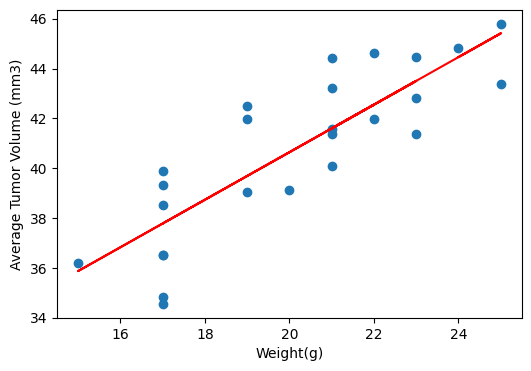

In [59]:
#Create the linear regression
line = slope*(combined_data['Weight (g)'])+intercept
#Scatter plot from previous
plt.figure(figsize=(6,4))
plt.scatter(combined_data['Weight (g)'],combined_data['Average Tumor Volume (mm3)'])
# plot the linear regression line which is the averaged line of all the values in red
# i used the .format() function to create a label of the red line using the slope and intercept from above
plt.plot(combined_data['Weight (g)'], line, 'r')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()